# Project Info
## Author: Johnny Zhong
## Purpose: CS373 - DADA Homework 4


### Credits
URL Parsing: https://github.com/surajr/URL-Classification/blob/master/URL%20Classification.ipynb

In [1]:
# most suspicious tlds
# source: https://www.symantec.com/blogs/feature-stories/top-20-shady-top-level-domains
Suspicious_TLD = ['.country', '.kim', '.science', '.gq', '.work', '.ninja', '.xyz',
                  '.date', '.faith', '.zip', '.racing', '.cricket', '.win', '.space',
                  '.accountant', '.realtor', '.top', '.stream', '.christmas', '.gdn',
                  '.mom', '.pro', '.men']

### url parsing methods

In [2]:
import ipaddress as ip #works only in python 3
def isip(uri):
    try:
        if ip.ip_address(uri):
            return 1
    except:
        return 0

#method to check the presence of hyphens
def isPresentHyphen(url):
    return url.count('-')

# method to check the presence of @
# Using “@” symbol in the URL leads the browser to 
# ignore everything preceding the “@” symbol and the 
# real address often follows the “@” symbol.
def isPresentAt(url):
    return url.count('@')

def isPresentDSlash(url):
    return url.count('//')

def countSubDir(url):
    return url.count('/')

# Method to count number of dots
def countdots(url):  
    return url.count('.')

# method to count delims
def countdelim(url):
    count = 0
    delim=[';','_','?','=','&']
    for each in url:
        if each in delim:
            count = count + 1
    
    return count

def get_ext(url):
    """Return the filename extension from url, or ''."""
    
    root, ext = splitext(url)
    return ext

def countSubDomain(subdomain):
    if not subdomain:
        return 0
    else:
        return len(subdomain.split('.'))
    
def countQueries(query):
    if not query:
        return 0
    else:
        return len(query.split('&'))

In [3]:
from urllib.parse import urlparse
import tldextract
def getFeatures(url): 
    result = []
    url = str(url)    
    #parse the URL and extract the domain information
    path = urlparse(url)
    ext = tldextract.extract(url)
    
    #counting number of dots in subdomain    
    result.append(countdots(ext.subdomain))
    
    #checking hyphen in domain   
    result.append(isPresentHyphen(path.netloc))
    
    #length of URL    
    result.append(len(url))
    
    #checking @ in the url    
    result.append(isPresentAt(path.netloc))
    
    #checking presence of double slash    
    result.append(isPresentDSlash(path.path))
    
    #Count number of subdir    
    result.append(countSubDir(path.path))
    
    #number of sub domain    
    result.append(countSubDomain(ext.subdomain))
    
    #length of domain name    
    result.append(len(path.netloc))
    
    # len of queries    
    result.append(len(path.query))
    
    #Adding domain information
    
    #if IP address is being used as a URL     
    result.append(isip(ext.domain))
    
    # presence of Suspicious_TLD
    result.append(1 if ext.suffix in Suspicious_TLD else 0)
    
    return result

In [4]:
# get data from json
# this includes some basic features
import pandas as pd

df = pd.read_json('train.json')
df.head()

,host_len,fragment,url_len,default_port,domain_age_days,tld,num_domain_tokens,ips,malicious_url,url,...,registered_domain,scheme,path,path_len,port,host,domain_tokens,mxhosts,path_tokens,num_path_tokens
0,12,None,84,80,5621,com,3,"[{'geo': 'CN', 'ip': '115.236.98.124', 'type':...",0,http://www.oppo.com/?utm_source=WeiBo&amp;utm_...,...,oppo.com,http,/,1,80,www.oppo.com,"[www, oppo, com]","[{'mxhost': 'mail1.oppo.com', 'ips': [{'geo': ...",[],1
1,29,None,58,80,172,com,3,"[{'geo': 'NL', 'ip': '5.39.220.76', 'type': 'A'}]",1,http://googledrive.royal-moments.com/docs/docs...,...,royal-moments.com,http,/docs/docs/googledocs/,22,80,googledrive.royal-moments.com,"[googledrive, royal-moments, com]","[{'mxhost': 'royal-moments.com', 'ips': [{'geo...","[docs, docs, googledocs, ]",4
2,39,None,53,80,9,com,6,"[{'geo': 'NL', 'ip': '46.21.161.247', 'type': ...",1,http://www.coinbase.com.agreement.advicecm.com...,...,advicecm.com,http,/wallet,7,80,www.coinbase.com.agreement.advicecm.com,"[www, coinbase, com, agreement, advicecm, com]","[{'mxhost': 'ASPMX2.GOOGLEMAIL.com', 'ips': [{...",[wallet],1
3,56,None,76,80,22,com,5,"[{'geo': 'HK', 'ip': '122.10.94.86', 'type': '...",1,http://eu.battle.net.blizzardentertainmentfree...,...,blizzardentertainmentfreeofactivitiese.com,http,/login/14.htm,13,80,eu.battle.net.blizzardentertainmentfreeofactiv...,"[eu, battle, net, blizzardentertainmentfreeofa...",NaN,"[login, 14.htm]",2
4,20,None,40,443,840,com,3,"[{'geo': 'US', 'ip': '199.59.149.243', 'type':...",0,https://business.twitter.com/twitter-101,...,twitter.com,https,/twitter-101,12,443,business.twitter.com,"[business, twitter, com]","[{'mxhost': 'ASPMX3.GOOGLEMAIL.com', 'ips': [{...",[twitter-101],1


In [5]:
# easy counting (to add features)

# count mxhosts
df['num_mxhosts'] = df['mxhosts'].str.len()
df['num_mxhosts'].fillna(0, inplace=True)

# count ips
df['num_ips'] = df['ips'].str.len()
df['num_ips'].fillna(0, inplace=True)

# factorize tld
df['tld_category'] = df['tld'].factorize()[0]

# factorize scheme
df['scheme_category'] = df['scheme'].factorize()[0]

# factorize file extensions
df['file_extension_category'] = df['file_extension'].factorize()[0]

# factorize file extensions
df['default_port_category'] = df['default_port'].factorize()[0]

In [6]:
df

,host_len,fragment,url_len,default_port,domain_age_days,tld,num_domain_tokens,ips,malicious_url,url,...,domain_tokens,mxhosts,path_tokens,num_path_tokens,num_mxhosts,num_ips,tld_category,scheme_category,file_extension_category,default_port_category
0,12,None,84,80,5621,com,3,"[{'geo': 'CN', 'ip': '115.236.98.124', 'type':...",0,http://www.oppo.com/?utm_source=WeiBo&amp;utm_...,...,"[www, oppo, com]","[{'mxhost': 'mail1.oppo.com', 'ips': [{'geo': ...",[],1,1.0,1.0,0,0,-1,0
1,29,None,58,80,172,com,3,"[{'geo': 'NL', 'ip': '5.39.220.76', 'type': 'A'}]",1,http://googledrive.royal-moments.com/docs/docs...,...,"[googledrive, royal-moments, com]","[{'mxhost': 'royal-moments.com', 'ips': [{'geo...","[docs, docs, googledocs, ]",4,1.0,1.0,0,0,-1,0
2,39,None,53,80,9,com,6,"[{'geo': 'NL', 'ip': '46.21.161.247', 'type': ...",1,http://www.coinbase.com.agreement.advicecm.com...,...,"[www, coinbase, com, agreement, advicecm, com]","[{'mxhost': 'ASPMX2.GOOGLEMAIL.com', 'ips': [{...",[wallet],1,4.0,1.0,0,0,-1,0
3,56,None,76,80,22,com,5,"[{'geo': 'HK', 'ip': '122.10.94.86', 'type': '...",1,http://eu.battle.net.blizzardentertainmentfree...,...,"[eu, battle, net, blizzardentertainmentfreeofa...",NaN,"[login, 14.htm]",2,0.0,1.0,0,0,0,0
4,20,None,40,443,840,com,3,"[{'geo': 'US', 'ip': '199.59.149.243', 'type':...",0,https://business.twitter.com/twitter-101,...,"[business, twitter, com]","[{'mxhost': 'ASPMX3.GOOGLEMAIL.com', 'ips': [{...",[twitter-101],1,5.0,4.0,0,1,-1,1
5,13,None,21,80,3789,com,3,"[{'geo': 'CN', 'ip': '123.126.99.31', 'type': ...",0,http://www.youku.com/,...,"[www, youku, com]","[{'mxhost': 'mx1.youku.com', 'ips': [{'geo': '...",[],1,3.0,1.0,0,0,-1,0
6,17,None,72,80,5647,cn,4,"[{'geo': 'HK', 'ip': '203.90.242.124', 'type':...",0,http://login.sina.com.cn/visitor/visitor?a=cro...,...,"[login, sina, com, cn]","[{'mxhost': 'freemx1.sinamail.sina.com.cn', 'i...","[visitor, visitor]",2,4.0,1.0,1,0,-1,0
7,18,None,54,80,52,br,3,"[{'geo': 'US', 'ip': '192.185.216.217', 'type'...",1,http://ciclobikelp.com.br/script_wideimage/ven...,...,"[ciclobikelp, com, br]","[{'mxhost': 'ciclobikelp.com.br', 'ips': [{'ge...","[script_wideimage, vendor, de77]",3,1.0,1.0,2,0,-1,0
8,17,None,25,80,87,com,3,"[{'geo': 'US', 'ip': '67.215.65.133', 'type': ...",1,http://www.urunalarm.com/,...,"[www, urunalarm, com]","[{'mxhost': 'urunalarm.com', 'ips': [{'geo': '...",[],1,1.0,1.0,0,0,-1,0
9,22,None,69,80,11,com,3,"[{'geo': 'US', 'ip': '209.188.7.134', 'type': ...",1,http://www.errandshopping.com/reb/bl.returns/p...,...,"[www, errandshopping, com]","[{'mxhost': 'errandshopping.com', 'ips': [{'ge...","[reb, bl.returns, pages, standard, email.php]",5,1.0,1.0,0,0,1,0


In [7]:
# create a feature set from the url
url_feature_set = pd.DataFrame(columns=('no of dots', 'presence of hyphen', 'len of url',
                                        'presence of at', 'presence of double slash',
                                        'no of subdir', 'no of subdomain', 'len of domain',
                                        'len of query', 'is IP', 'presence of suspicious tld'),
                              dtype='int32')

for i in range(len(df)):
    url_features = getFeatures(df['url'].loc[i])
    url_feature_set.loc[i] = url_features

In [8]:
url_feature_set.head()

,no of dots,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,len of query,is IP,presence of suspicious tld
0,0,0,84,0,0,1,1,12,63,0,0
1,0,1,58,0,0,4,1,29,0,0,0
2,3,0,53,0,0,1,4,39,0,0,0
3,2,0,76,0,0,2,3,56,0,0,0
4,0,0,40,0,0,1,1,20,0,0,0


In [9]:
# merge the url feature set back to the basic feature set
df_with_features = df.merge(url_feature_set, left_index=True, right_index=True)
df_with_features.head()

,host_len,fragment,url_len,default_port,domain_age_days,tld,num_domain_tokens,ips,malicious_url,url,...,presence of hyphen,len of url,presence of at,presence of double slash,no of subdir,no of subdomain,len of domain,len of query,is IP,presence of suspicious tld
0,12,None,84,80,5621,com,3,"[{'geo': 'CN', 'ip': '115.236.98.124', 'type':...",0,http://www.oppo.com/?utm_source=WeiBo&amp;utm_...,...,0,84,0,0,1,1,12,63,0,0
1,29,None,58,80,172,com,3,"[{'geo': 'NL', 'ip': '5.39.220.76', 'type': 'A'}]",1,http://googledrive.royal-moments.com/docs/docs...,...,1,58,0,0,4,1,29,0,0,0
2,39,None,53,80,9,com,6,"[{'geo': 'NL', 'ip': '46.21.161.247', 'type': ...",1,http://www.coinbase.com.agreement.advicecm.com...,...,0,53,0,0,1,4,39,0,0,0
3,56,None,76,80,22,com,5,"[{'geo': 'HK', 'ip': '122.10.94.86', 'type': '...",1,http://eu.battle.net.blizzardentertainmentfree...,...,0,76,0,0,2,3,56,0,0,0
4,20,None,40,443,840,com,3,"[{'geo': 'US', 'ip': '199.59.149.243', 'type':...",0,https://business.twitter.com/twitter-101,...,0,40,0,0,1,1,20,0,0,0


In [10]:
# drop columns where all values are false or 0
dropindices = [x for x, y in enumerate(df_with_features.any()) if y != True]
droplist = [y for x, y in enumerate(df_with_features.columns) if x in dropindices]
df_with_features = df_with_features.drop(columns=droplist)

In [11]:
df_with_features

,host_len,fragment,url_len,default_port,domain_age_days,tld,num_domain_tokens,ips,malicious_url,url,...,default_port_category,no of dots,presence of hyphen,len of url,presence of double slash,no of subdir,no of subdomain,len of domain,len of query,is IP
0,12,None,84,80,5621,com,3,"[{'geo': 'CN', 'ip': '115.236.98.124', 'type':...",0,http://www.oppo.com/?utm_source=WeiBo&amp;utm_...,...,0,0,0,84,0,1,1,12,63,0
1,29,None,58,80,172,com,3,"[{'geo': 'NL', 'ip': '5.39.220.76', 'type': 'A'}]",1,http://googledrive.royal-moments.com/docs/docs...,...,0,0,1,58,0,4,1,29,0,0
2,39,None,53,80,9,com,6,"[{'geo': 'NL', 'ip': '46.21.161.247', 'type': ...",1,http://www.coinbase.com.agreement.advicecm.com...,...,0,3,0,53,0,1,4,39,0,0
3,56,None,76,80,22,com,5,"[{'geo': 'HK', 'ip': '122.10.94.86', 'type': '...",1,http://eu.battle.net.blizzardentertainmentfree...,...,0,2,0,76,0,2,3,56,0,0
4,20,None,40,443,840,com,3,"[{'geo': 'US', 'ip': '199.59.149.243', 'type':...",0,https://business.twitter.com/twitter-101,...,1,0,0,40,0,1,1,20,0,0
5,13,None,21,80,3789,com,3,"[{'geo': 'CN', 'ip': '123.126.99.31', 'type': ...",0,http://www.youku.com/,...,0,0,0,21,0,1,1,13,0,0
6,17,None,72,80,5647,cn,4,"[{'geo': 'HK', 'ip': '203.90.242.124', 'type':...",0,http://login.sina.com.cn/visitor/visitor?a=cro...,...,0,0,0,72,0,2,1,17,31,0
7,18,None,54,80,52,br,3,"[{'geo': 'US', 'ip': '192.185.216.217', 'type'...",1,http://ciclobikelp.com.br/script_wideimage/ven...,...,0,0,0,54,0,3,0,18,0,0
8,17,None,25,80,87,com,3,"[{'geo': 'US', 'ip': '67.215.65.133', 'type': ...",1,http://www.urunalarm.com/,...,0,0,0,25,0,1,1,17,0,0
9,22,None,69,80,11,com,3,"[{'geo': 'US', 'ip': '209.188.7.134', 'type': ...",1,http://www.errandshopping.com/reb/bl.returns/p...,...,0,0,0,69,0,5,1,22,0,0


In [12]:
df_with_features.dtypes

host_len                      int64
fragment                     object
url_len                       int64
default_port                  int64
domain_age_days               int64
tld                          object
num_domain_tokens             int64
ips                          object
malicious_url                 int64
url                          object
alexa_rank                  float64
query                        object
file_extension               object
registered_domain            object
scheme                       object
path                         object
path_len                      int64
port                          int64
host                         object
domain_tokens                object
mxhosts                      object
path_tokens                  object
num_path_tokens               int64
num_mxhosts                 float64
num_ips                     float64
tld_category                  int64
scheme_category               int64
file_extension_category     

In [58]:
# get all non numerical types
df_only_features = df_with_features.select_dtypes(include=['int64', 'float64']).fillna(0)

In [59]:
# import the ML libraries

import sklearn.ensemble as ek
from sklearn import model_selection, tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.externals import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [60]:
for i, x in enumerate(df_only_features.drop(['malicious_url', 'default_port'],axis=1).columns):
    print(f'{i}: {x}')

0: host_len
1: url_len
2: domain_age_days
3: num_domain_tokens
4: alexa_rank
5: path_len
6: port
7: num_path_tokens
8: num_mxhosts
9: num_ips
10: tld_category
11: scheme_category
12: file_extension_category
13: default_port_category
14: no of dots
15: presence of hyphen
16: len of url
17: presence of double slash
18: no of subdir
19: no of subdomain
20: len of domain
21: len of query
22: is IP


In [61]:
print("Safe = 0, Malicious = 1")
print(df_only_features.groupby(df_only_features['malicious_url']).size())

X = df_only_features.drop(['malicious_url', 'default_port'],axis=1).values
y = df_only_features['malicious_url'].values

Safe = 0, Malicious = 1
malicious_url
0    1072
1     934
dtype: int64


In [62]:
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LogisticRegression":LogisticRegression()   
}

In [63]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,test_size=0.3)

In [64]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 1.0 
RandomForest : 1.0 
Adaboost : 1.0 
GradientBoosting : 1.0 
GNB : 0.6445182724252492 
LogisticRegression : 0.9867109634551495 


/Users/johnny/Projects/CS373_homework4/env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
winner = max(results, key=results.get)
print(winner)

DecisionTree


In [66]:
clf = model[winner]
res = clf.predict(X)
mt = confusion_matrix(y, res)
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 0.000000 %
False negative rate : 0.000000 %


[Text(167.4, 163.07999999999998, 'X[2] <= 401.0\ngini = 0.495\nsamples = 1404\nvalue = [772, 632]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 632\nvalue = [0, 632]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 772\nvalue = [772, 0]')]

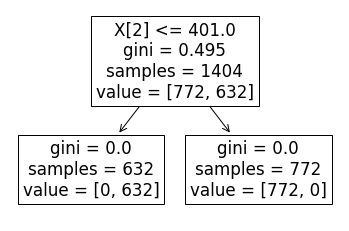

In [71]:
model = tree.DecisionTreeClassifier(max_depth=10)
# model = model.fit(X_train, y_train)
tree.plot_tree(model.fit(X_train, y_train))

In [68]:
len(X_train)

1404

In [69]:
len([x for x in y_train if x == 1]) + len([x for x in y_train if x == 0])

1404

In [70]:
len(X_test)

602